# Community detection - a good use of a network graph

In [8]:
import community
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## python-louvain package 
https://python-louvain.readthedocs.io/en/latest/

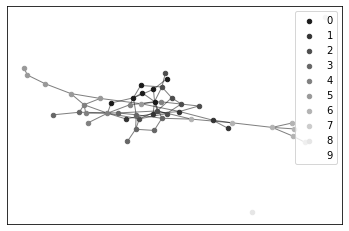

modularity >  0.5194920917799064


In [12]:
#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure

G = nx.erdos_renyi_graph(50, 0.05, seed=1)
# G = nx.karate_club_graph()

#first compute the best partition
partition = community.best_partition(G)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.



for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size),
                          label= com)


nx.draw_networkx_edges(G, pos, alpha=0.5)

plt.legend(loc=1)
plt.set_cmap('rainbow')
plt.show()


print ("modularity > ", community.modularity(partition, G))

In [13]:
partition

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 3,
 6: 5,
 7: 6,
 8: 4,
 9: 5,
 10: 3,
 11: 6,
 12: 2,
 13: 1,
 14: 0,
 15: 5,
 16: 6,
 17: 7,
 18: 4,
 19: 0,
 20: 0,
 21: 0,
 22: 2,
 23: 5,
 24: 1,
 25: 2,
 26: 6,
 27: 4,
 28: 3,
 29: 8,
 30: 3,
 31: 2,
 32: 4,
 33: 3,
 34: 1,
 35: 6,
 36: 0,
 37: 2,
 38: 6,
 39: 0,
 40: 3,
 41: 3,
 42: 6,
 43: 4,
 44: 1,
 45: 2,
 46: 2,
 47: 5,
 48: 9,
 49: 5}

In [14]:
clusters = set(partition.values())
values = partition.values()
for cc in clusters:
    print (cc, np.flatnonzero(np.array(list(values))== cc))

0 [ 0 14 19 20 21 36 39]
1 [ 1 13 24 34 44]
2 [ 2 12 22 25 31 37 45 46]
3 [ 3  5 10 28 30 33 40 41]
4 [ 4  8 18 27 32 43]
5 [ 6  9 15 23 47 49]
6 [ 7 11 16 26 35 38 42]
7 [17]
8 [29]
9 [48]


## community detection with networkx package

In [15]:
import networkx as nx
from networkx.algorithms import community as nxcommunity

communities_generator = nxcommunity.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  18,
  19,
  20,
  21,
  22,
  24,
  25,
  27,
  28,
  30,
  31,
  32,
  33,
  34,
  36,
  37,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  49],
 [7, 16, 26, 35, 38],
 [15, 23, 47],
 [17],
 [29],
 [48]]